In [28]:
# Import Dependencies
import warnings
warnings.filterwarnings('ignore')

In [29]:
%matplotlib inline
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [30]:
canna_data = pd.read_csv("../clean_data.csv")

In [31]:
canna_data.head()

,Unnamed: 0,City,State,Legal Status,Legal Status Code,Population,Violent Crime per Capita,Rape per Capita,Robbery per Capita,Aggravated Assault per Capita,Property Crime Total per Capita,Burglary per Capita,Larceny-Theft per Capita,Motor Vehicle Theft per Capita
0,0,Cedar Bluff,Alabama,Illegal,1.0,1823.0,0.002194,0.000000,0.000000,0.002194,0.019748,0.003840,0.014262,0.001646
1,1,Centre,Alabama,Illegal,1.0,3547.0,0.005639,0.001128,0.000000,0.004511,0.034959,0.003383,0.027347,0.004229
2,2,Daleville,Alabama,Illegal,1.0,5080.0,0.003150,0.000000,0.000197,0.002953,0.019291,0.003740,0.014173,0.001378
3,3,Enterprise,Alabama,Illegal,1.0,28569.0,0.004480,0.000595,0.000315,0.003500,0.025027,0.003395,0.019952,0.001680
4,4,Eufaula,Alabama,Illegal,1.0,11568.0,0.008212,0.000778,0.001297,0.005878,0.039419,0.008212,0.027490,0.003717


AttributeError: 'DataFrame' object has no attribute 'set_ylim'

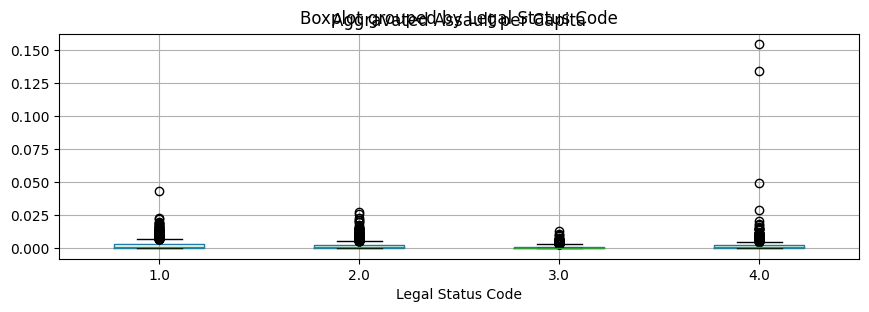

In [32]:
# Create a boxplot to compare means
canna_data.boxplot("Aggravated Assault per Capita", by="Legal Status Code", figsize=(10, 3))
canna_data.set_ylim(0, 0.5)

In [33]:
# Extract individual groups
group1aa = canna_data[canna_data["Legal Status Code"] == 1]["Aggravated Assault per Capita"]
group2aa = canna_data[canna_data["Legal Status Code"] == 2]["Aggravated Assault per Capita"]
group3aa = canna_data[canna_data["Legal Status Code"] == 3]["Aggravated Assault per Capita"]
group4aa = canna_data[canna_data["Legal Status Code"] == 4]["Aggravated Assault per Capita"]

In [34]:
# Perform the ANOVA
stats.f_oneway(group1aa, group2aa, group3aa, group4aa)

F_onewayResult(statistic=25.85015677348019, pvalue=1.259094890475868e-16)

In [35]:
groups = canna_data["Legal Status Code"]

In [36]:
data = canna_data["Aggravated Assault per Capita"]

In [37]:
# Perform the Tukey's HSD test
tukey = pairwise_tukeyhsd(data, groups)

# Print the results
print(tukey.summary())


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   1.0    2.0  -0.0004 0.0005 -0.0007 -0.0001   True
   1.0    3.0  -0.0013    0.0 -0.0017 -0.0009   True
   1.0    4.0  -0.0003 0.0466 -0.0006    -0.0   True
   2.0    3.0  -0.0009    0.0 -0.0013 -0.0005   True
   2.0    4.0   0.0001 0.7143 -0.0002  0.0004  False
   3.0    4.0    0.001    0.0  0.0006  0.0014   True
----------------------------------------------------


In [38]:
population1 = canna_data[canna_data["Legal Status Code"] == 1]["Aggravated Assault per Capita"]
population1.mean()

0.002335369969035455

In [39]:
# Calculate the population mean for stranger heights in Denver
population2 = canna_data[canna_data["Legal Status Code"] == 2]["Aggravated Assault per Capita"]
population2.mean()

0.001929168349053531

In [40]:
# Calculate the population mean for stranger heights in Denver
population3 = canna_data[canna_data["Legal Status Code"] == 3]["Aggravated Assault per Capita"]
population3.mean()

0.0010505631197218874

In [41]:
population4 = canna_data[canna_data["Legal Status Code"] == 4]["Aggravated Assault per Capita"]
population4.mean()

0.002049820190559613

In [42]:
# Calculate Independent (Two Sample) t-test
stats.ttest_ind(population2, population4, equal_var=False)

Ttest_indResult(statistic=-0.8472816354175352, pvalue=0.3969201519102594)